# Initialisations

In [6]:
import pandas as pd ; pd.set_option('display.max_columns', 500)
import numpy as np
from numpy import random ; random.RandomState(seed = 69)

from sklearn.model_selection import train_test_split

from sklearn import ensemble #gradientboosting
from sklearn import linear_model #lasso
from sklearn import tree #decision tree

from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
#joblib via sklearn.externals will be deprecated soon, so install and import joblib seperately
#import joblib
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import ipywidgets as widgets
def gradient_boosting_show_results(X, y, 
                    function = ensemble.GradientBoostingRegressor, 
                    hp_dict = {'learning_rate': 0.02, 
                               'loss': 'huber', 
                               'max_depth': 6, 
                               'max_features': 0.1, 
                               'min_samples_leaf': 9, 
                               'n_estimators': 2000}):
    print('Features:', list(X))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    print('Train-Test Split Complete. \n Hyperparameters:')
    for i in hp_dict:
        print(i, hp_dict[i])
    model = ensemble.GradientBoostingRegressor(
        n_estimators=hp_dict['n_estimators'],
        learning_rate=hp_dict['learning_rate'],
        max_depth= hp_dict['max_depth'],
        min_samples_leaf = hp_dict['min_samples_leaf'],
        max_features=hp_dict['max_features'],
        loss=hp_dict['loss'])

    model.fit(X_train, y_train)
    print('Model trained')
    
    important_features_dict = {}
    for x,i in enumerate(model.feature_importances_):
        important_features_dict[x]=i


    important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
    
    importances = model.feature_importances_ # get np.array of importance values
  #  print("\n\n", importances, "\n\n")
    indices = np.argsort(importances)[::-1] # sort importance values descending order
    X_columns = X.columns
  #  # Print the feature ranking
  #  print("Feature ranking:")
#
  #  for f in range(X.shape[1]):
  #      print("%d. feature %s (%f)" % (f + 1, X_columns[f], importances[indices[f]]))
#
    # Plot the feature importances of the forest
    plt.figure(figsize=(10, 5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="r", align="center")
    plt.xticks(range(X.shape[1]), X_columns[important_features_list], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
    pred_list = []
    for i in range(0, len(X)):
        prediction = model.predict([X.iloc[i]])
        pred_list.append(prediction)
    
    exp_calc_df = pd.DataFrame(y)
    exp_calc_df['Predicted'] = pred_list
    exp_calc_df.rename({0:'Experimental'}, inplace=True, axis=1)
    exp_calc_df.head()
    print('Training Score:\t', model.score(X_train, y_train))
    print('Testing Score:\t', model.score(X_test, y_test))
    
    print("$R^2$:\t", metrics.r2_score(y, pred_list))
    
    train_mse = mean_absolute_error(y_train, model.predict(X_train))
    print('Training error: \t', train_mse)
    test_mse = mean_absolute_error(y_test, model.predict(X_test))
    print('Testing error: \t', test_mse)
    
    save = input('Save model with joblib.dump? (y/n) \t')
    if save == 'y':
        filename = input('File name for model dump - extension and path added automatically :\t')
        name = "model_dump/" + filename + ".pkl"
        path = "C:\\Users\jtd1g16\Documents\Masters\Henry's Law\model_dump\\" + filename + '.pkl'
        print('Model saved: \t', path)
        joblib.dump(model, name)
        return important_features_list, exp_calc_df
    if save == 'n':
        print('Model not saved')
        return important_features_list, exp_calc_df

# Histogram of Max-Min
Most species have little change in HLCs

Text(0.5, 1.0, 'Max-Min log(H) per species')

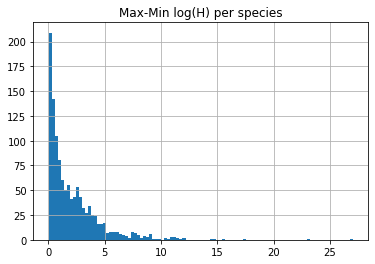

In [2]:
const_list_df = pd.read_csv('summary_stats_curated.csv')
hist = const_list_df[const_list_df['max-min']!=0]['max-min'].hist(bins=100)
hist.set_title('Max-Min log(H) per species')

# ML Bit
First passing all DRAGON descriptors, then reducing dimensionality by removing features of low importance

In [2]:
data = pd.read_csv('filtered_organics_desc_kh.csv')
data.dropna(axis=0, inplace=True)
species = data.iloc[:, 1]
smiles = list(data['Unnamed: 0'])
data.drop(['Unnamed: 0', '0'], axis=1, inplace=True)

X = data.drop(['Kh_mean', 'Kh_first', 'Varying_1', 'Varying_2', 'Varying_3',
 'Varying_4', 'Varying_5', 'Varying_6', 'Varying_7', 'Varying_8', 'Varying_9'], axis=1)
y_first = data['Kh_first']
y_mean = data['Kh_mean']

Features: ['MW', 'AMW', 'Sv', 'Se', 'Sp', 'Si', 'Mv', 'Me', 'Mp', 'Mi', 'nAT', 'nSK', 'nBT', 'nBO', 'nBM', 'SCBO', 'RBN', 'RBF', 'nDB', 'nTB', 'nAB', 'nH', 'nC', 'nN', 'nO', 'nS', 'nF', 'nCL', 'nBR', 'nI', 'nHM', 'nHet', 'nX', 'H%', 'C%', 'N%', 'O%', 'X%', 'nCsp3', 'nCsp2', 'nCsp', 'nCIC', 'nCIR', 'TRS', 'Rperim', 'Rbrid', 'MCD', 'RFD', 'RCI', 'NRS', 'NNRS', 'nR03', 'nR04', 'nR05', 'nR06', 'nR07', 'nR08', 'nR09', 'nR10', 'nR11', 'nR12', 'nBnz', 'ARR', 'D/Dtr03', 'D/Dtr04', 'D/Dtr05', 'D/Dtr06', 'D/Dtr07', 'D/Dtr08', 'D/Dtr09', 'D/Dtr10', 'D/Dtr11', 'D/Dtr12', 'Wap', 'S1K', 'S2K', 'S3K', 'PHI', 'PW2', 'PW3', 'PW4', 'PW5', 'MAXDN', 'MAXDP', 'DELS', 'TIE', 'Psi_i_s', 'Psi_i_A', 'Psi_i_0', 'Psi_i_1', 'Psi_i_t', 'Psi_i_0d', 'Psi_i_1d', 'Psi_i_1s', 'Psi_e_A', 'Psi_e_0', 'Psi_e_t', 'Psi_e_0d', 'MWC01', 'MWC02', 'MWC03', 'MWC04', 'MWC05', 'MWC06', 'MWC07', 'MWC08', 'MWC09', 'MWC10', 'SRW02', 'SRW03', 'SRW04', 'SRW05', 'SRW06', 'SRW07', 'SRW08', 'SRW09', 'SRW10', 'MPC01', 'MPC02', 'MPC03', 'MPC

Model trained


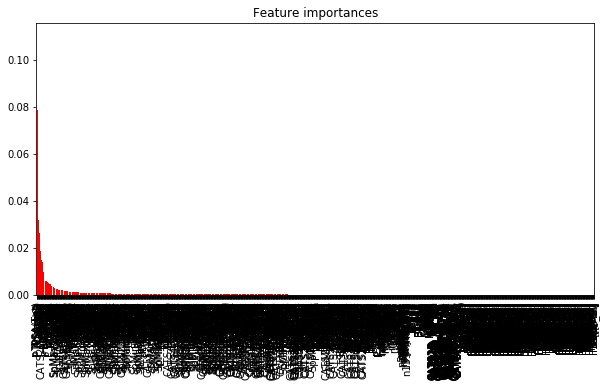

Training Score:	 0.9907119127617791
Testing Score:	 0.8549376127780477
$R^2$:	 0.9485039001052561
Training error: 	 0.2200715697825007
Testing error: 	 1.499658381137055
Save model with joblib.dump? (y/n) 	n
Model not saved


In [7]:
importances, exp_calc_df_1 = gradient_boosting_show_results(X, y_first)

## Using most important features to reduce dimensionality
1466 total descriptors, using most important 50

Features: ['P_VSA_p_2', 'TPSA(Tot)', 'P_VSA_v_2', 'TPSA(NO)', 'F01[C-N]', 'Me', 'SAacc', 'GATS1e', 'SAdon', 'AAC', 'nHDon', 'O%', 'CATS2D_02_DA', 'AMW', 'LLS_02', 'IC0', 'H-050', 'B01[C-O]', 'nHet', 'T(N..O)', 'B03[C-O]', 'GATS1m', 'GATS1p', 'Mp', 'P_VSA_e_3', 'nHAcc', 'MATS1e', 'Psi_e_A', 'SIC1', 'Hy', 'P_VSA_e_5', 'B02[C-N]', 'Mi', 'H-046', 'F01[C-O]', 'DELS', 'nN', 'MATS1m', 'nO', 'IC1', 'GATS1v', 'ATS1m', 'Mv', 'H-047', 'SpMax1_Bh(m)', 'PDI', 'B01[C-N]', 'P_VSA_v_3', 'SpMax2_Bh(m)', 'H%']
Train-Test Split Complete. 
 Hyperparameters:
learning_rate 0.02
loss huber
max_depth 6
max_features 0.1
min_samples_leaf 9
n_estimators 2000
Model trained


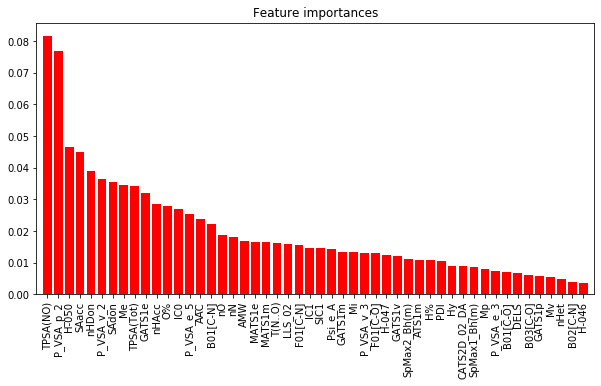

Training Score:	 0.9724004445828068
Testing Score:	 0.8624866914723933
$R^2$:	 0.9388605848769346
Training error: 	 0.4800724440764785
Testing error: 	 1.5731642699212938
Save model with joblib.dump? (y/n) 	y
File name for model dump - extension and path added automatically :	kh_predictor
Model saved: 	 C:\Users\jtd1g16\Documents\Masters\Henry's Law\model_dump\kh_predictor.pkl


In [9]:
actually_important_features = pd.Series(list(X))[importances][0:50]
X = data[actually_important_features]
importances1, exp_calc_df_1 = gradient_boosting_show_results(X, y_first)

In [16]:
vary_list = ['Varying_1', 'Varying_2', 'Varying_3', 'Varying_4', 'Varying_5',
             'Varying_6', 'Varying_7', 'Varying_8', 'Varying_9']
const_type = ['Kh_first', 'Kh_mean']
X_list = list(X) ; colour_list = []
for feature in X_list:
    colour_list.append("X." + str(feature))
@widgets.interact()
def plot_scatter_colour(colour_by = vary_list,
                       constant_type = const_type):
    if constant_type == 'Kh_first':
        constant_num = 1
    if constant_type == 'Kh_mean':
        constant_num = 2
    fig = plt.figure(figsize=(13, 10))
    scatter = plt.scatter(list(eval('exp_calc_df_%i.iloc[:, 0]'%constant_num)),
                          list(eval('exp_calc_df_%i.Predicted'%constant_num)),
                      c = eval('data[colour_by]'), cmap = 'bwr')
    plt.colorbar()
    plt.xlabel('Experimental')
    plt.ylabel('Predicted')
    plt.title('Predited vs experimental log(Kh), coloured by {}'.format(colour_by))
    plt.plot([-35, 20], [-35, 20])
    labels = ['{}'.format(i) for i in species]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    plt.show()

interactive(children=(Dropdown(description='colour_by', options=('Varying_1', 'Varying_2', 'Varying_3', 'Varyi…

- weight values which i dont believe are correct
- Have a closer look at the linear hydrocarbons, why are the larger chains getting higher solubility? look at the papers where they were found and figure out what's going on

- Jeremy mentioned including multiple values for each molecule to make the range of values explicit, will this not effect how much I can trust predicitons from the model?
- Varying values seem to be mixed in with others. I might need to find a better way to filter this data.
- `Varying_5` marks species who's HLCs vary by at least 5 log units

In [48]:
hc_list = []
for i in range(0, 40):
    hc_smi = 'C' * i
    for smi_str in smiles:
        if smi_str == hc_smi:
            hc_list.append(smiles.index(smi_str))

## Grid search then repeat

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y_first, test_size=0.3)

In [100]:
model = ensemble.GradientBoostingRegressor()

# Parameters we want to try
param_grid = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [2, 4, 6],
    'min_samples_leaf': [3, 5, 9, 15],
    'learning_rate': [0.1, 0.05, 0.02],
    'max_features': [1.0, 0.3, 0.1, 0.01],
    'loss': ['ls', 'lad', 'huber']
}

# Define the grid search we want to run. Run it with four cpus in parallel.
gs_cv = GridSearchCV(model, param_grid, n_jobs=2)

# Run the grid search - on only the training data!
gs_cv.fit(X_train, y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

# After running a .....long..... time, the output will be something like
# {'loss': 'huber', 'learning_rate': 0.1, 'min_samples_leaf': 9, 'n_estimators': 3000, 'max_features': 0.1, 'max_depth': 6}


{'learning_rate': 0.02, 'loss': 'huber', 'max_depth': 4, 'max_features': 0.1, 'min_samples_leaf': 9, 'n_estimators': 2000}


Features: ['TPSA(NO)', 'TPSA(Tot)', 'P_VSA_p_2', 'P_VSA_v_2', 'H-050', 'nHDon', 'P_VSA_e_5', 'Me', 'SAdon', 'LLS_02', 'IC1', 'nHAcc', 'GATS1e', 'AAC', 'SAacc', 'IC0', 'O%', 'B01[C-N]', 'AMW', 'Hy', 'F01[C-N]', 'SIC1', 'MATS1e', 'F03[C-O]', 'P_VSA_e_3', 'P_VSA_v_3', 'N%', 'GATS1m', 'Psi_e_A', 'P_VSA_m_3', 'SCBO', 'F06[C-N]', 'Psi_i_A', 'H-046', 'MATS1m', 'H%', 'Mi', 'B02[C-N]', 'NsOH', 'MPC05', 'CATS2D_02_DA', 'P_VSA_p_3', 'F04[C-O]', 'GATS1v', 'nO', 'nCIC', 'CATS2D_01_AA', 'MCD', 'DELS', 'H-047']
Train-Test Split Complete. 
 Hyperparameters:
learning_rate 0.02
loss huber
max_depth 6
max_features 0.1
min_samples_leaf 9
n_estimators 2000
Model trained


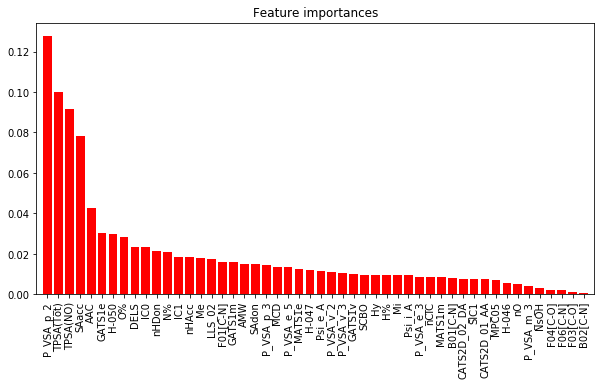

Training Score:	 0.982081275330325
Testing Score:	 0.8464533768100677
$R^2$:	 0.9404760686638455
Training error: 	 0.415721078089018
Testing error: 	 1.6558524736301317
Save model with joblib.dump? (y/n) 	y
File name for model dump - extension and path added automatically :	gradboost_50_important_gs_02_12
Model saved: 	 C:\Users\jtd1g16\Documents\Masters\Henry's Law\model_dump\gradboost_50_important_gs_02_12.pkl


In [101]:
importances_gs, exp_calc_df_gs = gradient_boosting_show_results(X_train, y_train, {'learning_rate': 0.02, 'loss': 'huber', 'max_depth': 4, 'max_features': 0.1, 'min_samples_leaf': 9, 'n_estimators': 2000})

# Longer chain hydrocarbons
These species seem to have bad predictions - why?

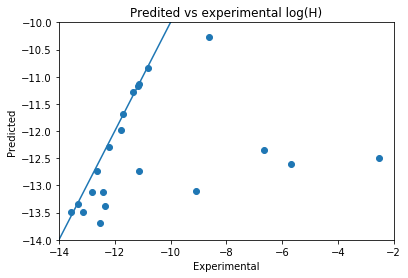

In [103]:
hydrocarbons = data.iloc[hc_list].Kh_mean
hydro_preds = exp_calc_df_1.iloc[hc_list].Predicted
fig = plt.figure()
scatter = plt.scatter(hydrocarbons, hydro_preds)
plt.xlabel('Experimental')
xlim = plt.xlim(-14, -2)
ylim = plt.ylim(-14, -10)
plt.ylabel('Predicted')
plt.title('Predited vs experimental log(H)')
plt.plot(xlim, [-14, -2])
labels = ['{}'.format(i) for i in species.iloc[hc_list]]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

In [112]:
carbon_count_list = []
lin_hc_smiles = pd.Series(smiles).iloc[hc_list]
for i in lin_hc_smiles:
    carbon_count_list.append(i.count('C'))

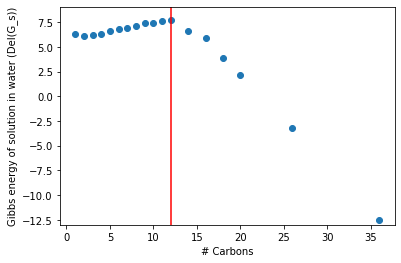

In [152]:
# data source
# https://pubs.rsc.org/en/content/articlepdf/1984/f1/f19848000153
carbon_count = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 26, 36])
del_G = pd.Series([6.28, 6.11, 6.23, 6.35, 6.61, 6.82, 6.90, 7.16, 7.42, 7.44, 7.66, 7.72, 6.64, 5.88, 3.88, 2.19, -3.25, -12.55])
scatter = plt.scatter(carbon_count, del_G)
plt.plot((12, 12), (-13, 9), c='red')
plt.ylim(-13, 9)
plt.xlabel('# Carbons')
plt.ylabel('Gibbs energy of solution in water (Del(G_s))')
plt.show()

Text(0, 0.5, 'log(H)')

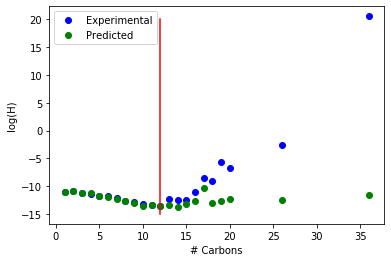

In [151]:
fig, ax = plt.subplots()
ax.plot(carbon_count_list, hydrocarbons, 'bo', c='blue', label = 'Experimental')
ax.plot(carbon_count_list, hydro_preds, 'bo', c='green', label = 'Predicted')
plt.plot((12, 12), (-15, 20), c='red', label='_c12')
ax.legend()
plt.xlabel('# Carbons')
plt.ylabel('log(H)')

# 500 Word summary feedback
- Good overall summary of the direction of the project with clears ideas of how to set up the problem and see if the resulting models are likely tone useful.  
- Will be good to gain greater clarity of the general scopes of computational chemistry and perhaps its limitations.  
- It is very good to see a general plan of action with milestones.  
- You could make better use of paragraphs to bring related sentences together and also section headings (this will be more important in a longer report). 
- Will be good to start the literature survey soon as this may turn up ideas that are important and useful for your actual modelling work.

# Future Stuff
- Still interested in PhD
    - Graeme has an interesting looking PhD but looking at the content I feel out of my depth
- Locked into a house in southampton for the next year at least
- Thinking of working for a year if a PhD doesn't come up
- Definitely want to be doing computational work
    - Data science
- A situation like Sam's would be ideal, if that's an option
- Haven't heard much from Simon Coles regarding working for the PSDS, but understand it's a busy time